# 什么是决策树?

<img style="float: right;" src="微信截图_20180908220250.png" width="100%">

<img style="float: right;" src="" width="100%">

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

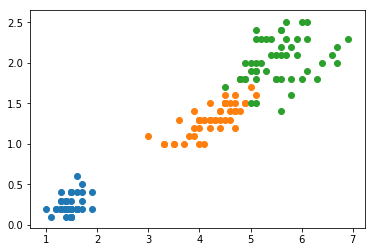

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf= DecisionTreeClassifier(max_depth=2, criterion='entropy')  # 决策树最高的高度
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


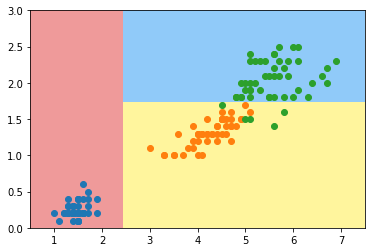

In [13]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [ ]:
<img style="float: right;" src="" width="100%">

<img style="float: right;" src="微信截图_20180908221734.png" width="100%">

<img style="float: right;" src="QQ截图20180908221950.png" width="100%">

<img style="float: right;" src="QQ截图20180908222122.png" width="100%">

<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

In [ ]:
<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

<img style="float: right;" src="QQ截图20180908222745.png" width="100%">

## 二分类

<img style="float: right;" src="QQ截图20180908223316.png" width="100%">

In [20]:
def entropy(p):
    return -p*np.log(p)- (1-p)*np.log(1-p)

In [21]:
x = np.linspace(0.01,0.99,200)

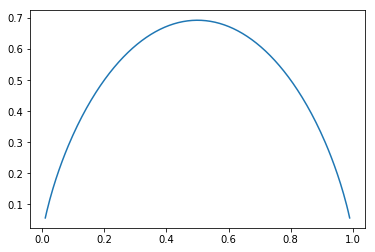

In [22]:
plt.plot(x,entropy(x))
plt.show() # 当两类数据所占比例相同时，信息熵最大，数据最不确定

# 使用信息熵寻找最优划分

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


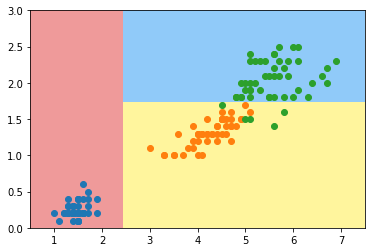

In [27]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

## 模拟使用信息熵进行划分

In [34]:
def split(X,y,d,value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a],y[index_b]

In [43]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X,y):
    
    best_entropy = float('inf')
    best_d, best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sorted_index[i-1], d]!=X[sorted_index[i],d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i],d]) / 2
                x_l,x_r,y_l,y_r = split(X,y,d,v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e,d,v
    return best_entropy, best_d, best_v

In [45]:
best_entropy, best_d, best_v = try_split(X,y)
print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [49]:
X1_l, X1_r, y1_l,y1_r = split(X,y,best_d,best_v)

In [51]:
entropy(y1_l)

0.0

In [52]:
entropy(y1_r)

0.6931471805599453

In [53]:
best_entropy2, best_d2, best_v2 = try_split(X1_r,y1_r)
print("best_entropy = ", best_entropy2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_entropy =  0.4132278899361904
best_d =  1
best_v =  1.75


In [54]:
X2_l, X2_r, y2_l,y2_r = split(X1_r,y1_r,best_d2,best_v2)

In [57]:
entropy(y2_l)

0.30849545083110386

In [58]:
entropy(y2_r)

0.10473243910508653

## 基尼系数

In [ ]:
<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

<img style="float: right;" src="QQ截图20180908231034.png" width="100%">

## 二维模拟

<img style="float: right;" src="QQ截图20180908231133.png" width="100%">

<img style="float: right;" src="QQ截图20180908231526.png" width="100%">

# CART与决策树中的超参数

In [ ]:
<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

<img style="float: right;" src="QQ截图20180908232120.png" width="100%">

<img style="float: right;" src="QQ截图20180908232436.png" width="100%">

In [61]:
from sklearn import datasets

X,y = datasets.make_moons(noise=0.25, random_state=666)

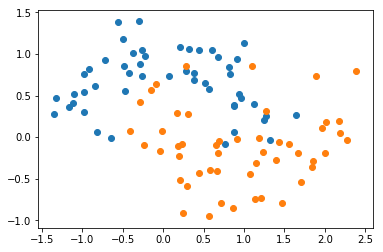

In [62]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


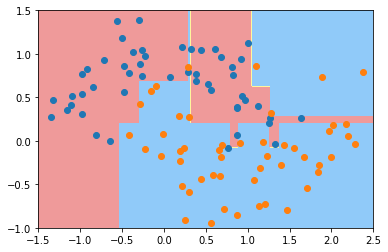

In [65]:
plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


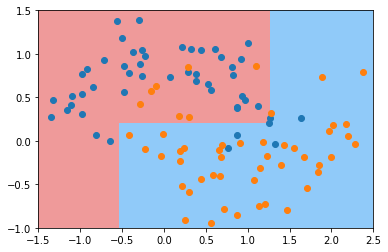

In [69]:
dt_clf = DecisionTreeClassifier(max_depth=2)

dt_clf.fit(X,y)

plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


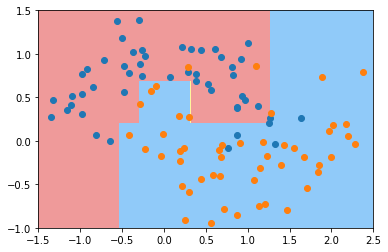

In [72]:
dt_clf = DecisionTreeClassifier(min_samples_split=10)#一个节点来说至少要有多少个节点才继续拆分下去

dt_clf.fit(X,y)

plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


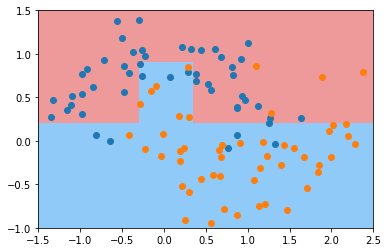

In [73]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6)#叶子节点至少有多少个样本

dt_clf.fit(X,y)

plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


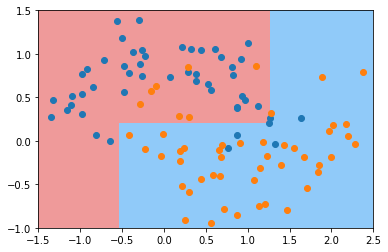

In [75]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=4) #叶子节点最多为多少

dt_clf.fit(X,y)

plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [ ]:
<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

<img style="float: right;" src="QQ截图20180908234206.png" width="100%">

<img style="float: right;" src="QQ截图20180908234709.png" width="100%">

## 输出某个类别中的平均值

In [77]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

# 决策树 Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [81]:
dt_reg.score(X_test, y_test)

0.6007002845237435

In [82]:
dt_reg.score(X_train,y_train) # 过拟合 

1.0

<img style="float: right;" src="QQ截图20180908235429.png" width="100%">

<img style="float: right;" src="QQ截图20180908235509.png" width="100%">

<img style="float: right;" src="QQ截图20180908235557.png" width="100%">

In [ ]:
<img style="float: right;" src="QQ截图20180908222250.png" width="100%">

# 决策树的局限性

<img style="float: right;" src="QQ截图20180908235910.png" width="100%">

<img style="float: right;" src="QQ截图20180909000936.png" width="100%">
<img style="float: right;" src="QQ截图20180909000943.png" width="100%">

## 斜线不能划分出来

<img style="float: right;" src="QQ截图20180909001107.png" width="100%">
<img style="float: right;" src="QQ截图20180909001121.png" width="100%">

## 并查集的局限性

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


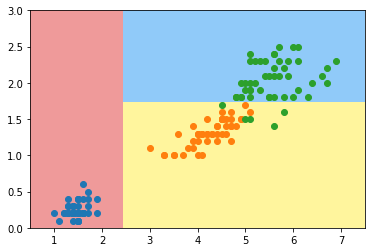

In [111]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

dt_clf= DecisionTreeClassifier(max_depth=2, criterion='entropy')  # 决策树最高的高度
dt_clf.fit(X,y)

plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [112]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y,138)

In [113]:
X_new.shape

(149, 2)

In [114]:
y_new.shape

(149,)

In [115]:
tree_clf2  = DecisionTreeClassifier(max_depth=2,criterion="entropy")
tree_clf2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


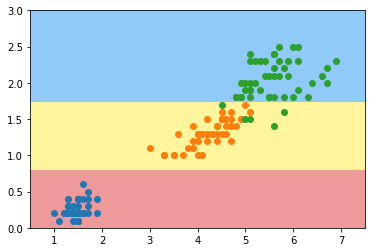

In [116]:
plot_decision_boundary(tree_clf2,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

### （非参数学习） 对个别参数非常敏感